In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'likelihoods_2.npy'

# load numpy array from npy file
likelihoods = np.load(path)

likelihoods.shape

(10, 6, 11)

In [3]:
alphas, v0s = np.linspace(0.35, .65, 10), np.linspace(0, .35, 11)
betas = np.logspace(np.log10(5), np.log10(20), 6)

alphas.shape, betas.shape, v0s.shape

((10,), (6,), (11,))

In [4]:
abs_best = np.where(likelihoods == np.max(likelihoods))
abs_best[1][0]

3

-4.324430096843526
-4.003754548978112
-3.8283733081162135
-3.8156545246543514
-4.014270829798538
-4.4281349943293655


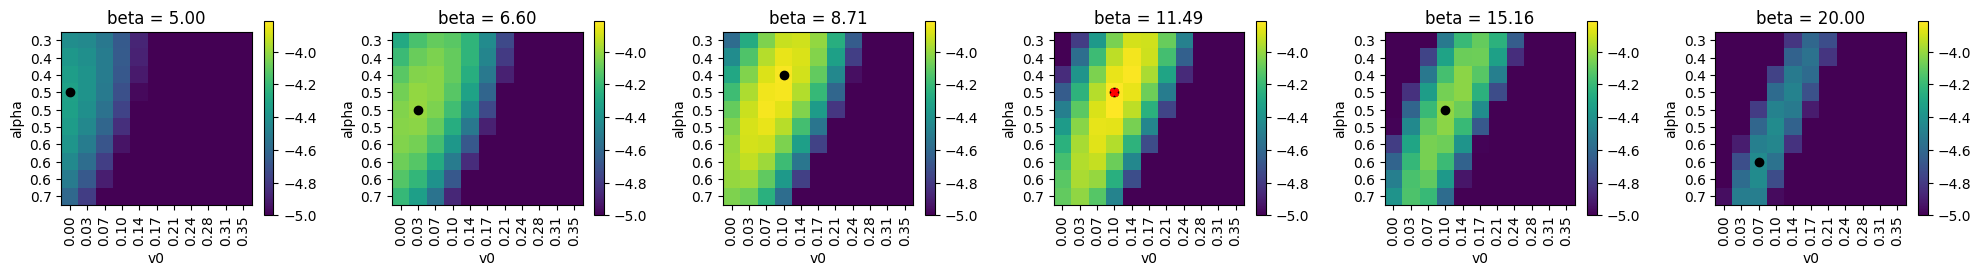

In [8]:
# plot hetmap of all betas, put text in each cell
fig, axes = plt.subplots(1, len(betas), figsize=(20, 10))

for i, beta in enumerate(betas):
    data = likelihoods[:, i, :]/1000
    im = axes[i].imshow(data, vmin=-5, vmax=likelihoods.max()/1000)
    axes[i].set_title('beta = {:.2f}'.format(beta))
    axes[i].set_xticks(np.arange(len(v0s)))
    axes[i].set_yticks(np.arange(len(alphas)))
    axes[i].set_xticklabels(['{:.2f}'.format(a) for a in v0s])
    axes[i].set_yticklabels(['{:.1f}'.format(v) for v in alphas])
    # rotatae xticks
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('v0')
    axes[i].set_ylabel('alpha')

    # cbar
    cbar = axes[i].figure.colorbar(im, ax=axes[i], shrink=0.2)

    # plot dot on maxima
    maxima = np.where(data == np.max(data))
    axes[i].plot(maxima[1], maxima[0], 'o', color='black')
    print(np.max(data))


abs_best = np.where(likelihoods == np.max(likelihoods))
axes[abs_best[1][0]].plot(abs_best[2], abs_best[0], 'X', color='red')

plt.tight_layout()